In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix

In [3]:
data = fetch_california_housing(as_frame = True)
df = data.frame

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<function matplotlib.pyplot.show(close=None, block=None)>

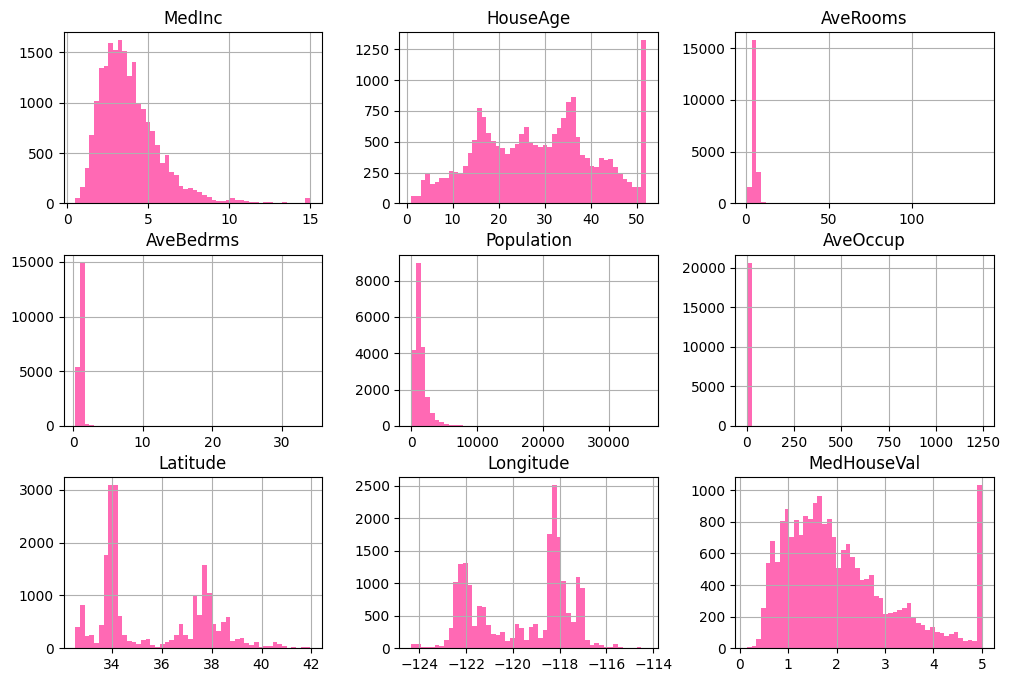

In [5]:
df.hist(bins=50, figsize=(12,8), color ='hotpink') #viewing the disturbution of columns
plt.show

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df.shape

(20640, 9)

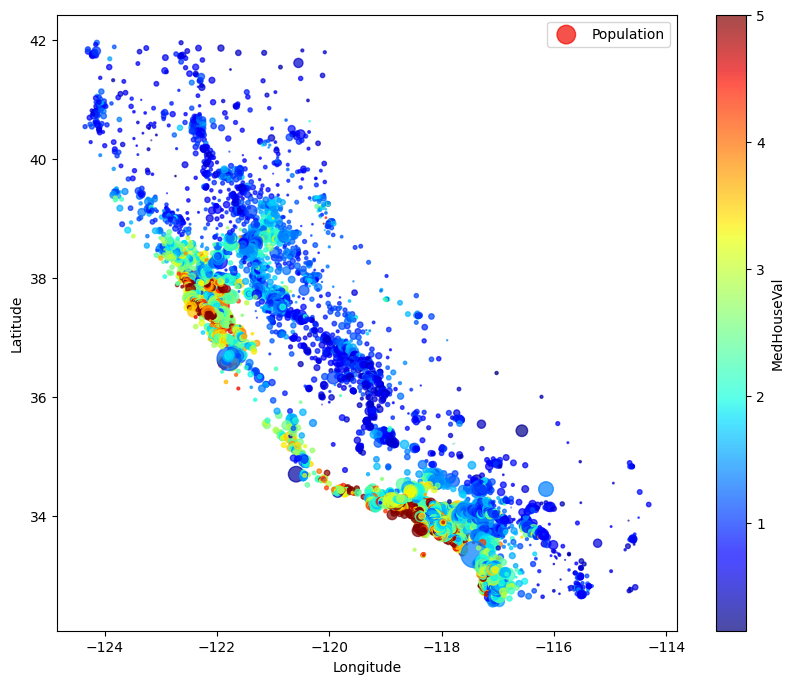

In [9]:
#Plot The housing value with respect to longitude and latiude

df.plot(kind='scatter', #Scatter Plot
        x = 'Longitude',
        y = 'Latitude',
        c = 'MedHouseVal', # Use the medhouseval to determine the color of each point
        cmap = 'jet',
        colorbar = True, #Displays a color bar alongside the plot
        legend = True,
        sharex = False, # The x-axis should not be shared in subplots
        figsize = (10,8),
        s = df['Population']/100, # Sets the size of each point proportional to the population, the size of the markers are scaled.
        label = 'Population',
        alpha = 0.7,  # Sets the transperncy level to 70% opacity
        )
plt.show()

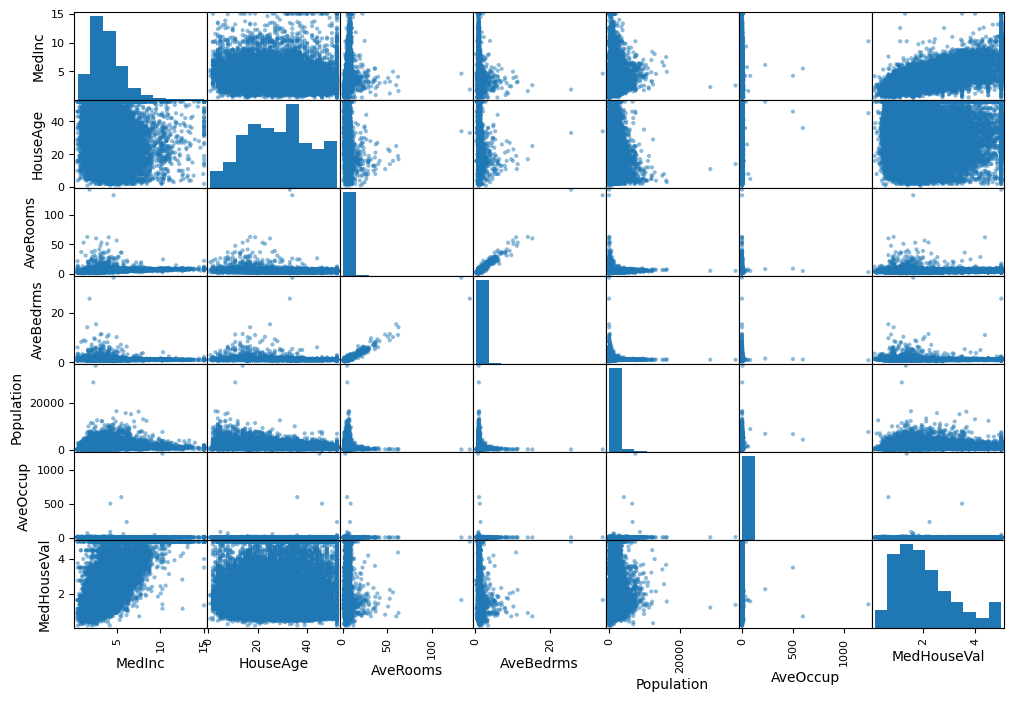

In [10]:
#Plotting the correlation btwn features
features = ['MedInc',
            'HouseAge',
            'AveRooms',
            'AveBedrms',
            'Population',
            'AveOccup',
            'MedHouseVal',]

scatter_matrix(df[features], figsize=(12,8))
plt.show()

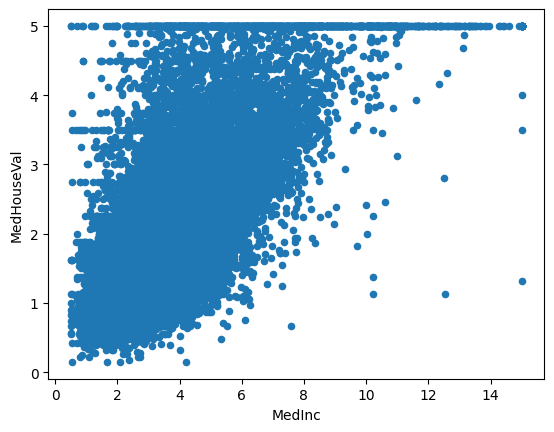

In [11]:
#Plotting the correlation between medIn and the med
df.plot(kind='scatter',
        x ='MedInc',
        y='MedHouseVal')
plt.show()

In [12]:
corr_ = df.corr()
corr_['MedHouseVal'].sort_values(ascending=True)

,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
MedHouseVal,1.000000


In [13]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [14]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [17]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [18]:
regression_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [19]:
y_pred = regression_pipeline.predict(X_test)

In [20]:
r2_score(y_test, y_pred)

0.575787706032451

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.7455813830127763


In [24]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)


R² Score: 0.575787706032451
RMSE: 0.7455813830127763
